<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lea-el-contenido-de-ejemplo_clasif.csv-sobre-un-DataFrame" data-toc-modified-id="Lea-el-contenido-de-ejemplo_clasif.csv-sobre-un-DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lea el contenido de ejemplo_clasif.csv sobre un DataFrame</a></span></li><li><span><a href="#Realice-las-siguientes-tareas-de-preprocesamiento:-separación-en-tokens-y-a-su-voluntad-extracción-de-raíces-(stemming)-u-obtención-de-formas-normales.-Imprima-el-resultado.-Puede-utilizar-a-su-voluntad-las-librerías-NLTK-o-spaCy" data-toc-modified-id="Realice-las-siguientes-tareas-de-preprocesamiento:-separación-en-tokens-y-a-su-voluntad-extracción-de-raíces-(stemming)-u-obtención-de-formas-normales.-Imprima-el-resultado.-Puede-utilizar-a-su-voluntad-las-librerías-NLTK-o-spaCy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Realice las siguientes tareas de preprocesamiento: separación en tokens y a su voluntad extracción de raíces (stemming) u obtención de formas normales. Imprima el resultado. Puede utilizar a su voluntad las librerías NLTK o spaCy</a></span></li><li><span><a href="#Obtenga-e-imprima-la-matriz-de-Bag-of-Words" data-toc-modified-id="Obtenga-e-imprima-la-matriz-de-Bag-of-Words-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Obtenga e imprima la matriz de Bag-of-Words</a></span></li><li><span><a href="#Obtenga-e-imprima-la-matriz-TF-IDF" data-toc-modified-id="Obtenga-e-imprima-la-matriz-TF-IDF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Obtenga e imprima la matriz TF-IDF</a></span></li><li><span><a href="#Obtenga-e-imprima-la-matriz-de-similitud-de-documentos.-Se-recomienda-utilizar-la-similitud-coseno" data-toc-modified-id="Obtenga-e-imprima-la-matriz-de-similitud-de-documentos.-Se-recomienda-utilizar-la-similitud-coseno-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Obtenga e imprima la matriz de similitud de documentos. Se recomienda utilizar la similitud coseno</a></span></li><li><span><a href="#Realice-una-clusterización-de-los-documentos-por-similitud.-Utilice-la-matriz-obtenida-en-el-paso-anterior-y-agrupe-los-documentos-utilizando-la-varianza-de-Ward.-Representa-el-dendograma-correspondiente.-Imptima-en-formato-tabla-los-documentos-y-la-etiqueta-cluster-correspondiente.-Se-recomienda-utilizar-un-valor-para-la-distancia-máxima-de-2.0" data-toc-modified-id="Realice-una-clusterización-de-los-documentos-por-similitud.-Utilice-la-matriz-obtenida-en-el-paso-anterior-y-agrupe-los-documentos-utilizando-la-varianza-de-Ward.-Representa-el-dendograma-correspondiente.-Imptima-en-formato-tabla-los-documentos-y-la-etiqueta-cluster-correspondiente.-Se-recomienda-utilizar-un-valor-para-la-distancia-máxima-de-2.0-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Realice una clusterización de los documentos por similitud. Utilice la matriz obtenida en el paso anterior y agrupe los documentos utilizando la varianza de Ward. Representa el dendograma correspondiente. Imptima en formato tabla los documentos y la etiqueta cluster correspondiente. Se recomienda utilizar un valor para la distancia máxima de 2.0</a></span></li><li><span><a href="#Por-ultimo,-a-partir-de-la-matriz-TF-IDF-obtenida-en-el-paso-4,-realice-una-clasificación-utilizando-el-algoritmo-Naive-Bayesiano-y-obtenga-la-matriz-de-confusión-correspondiente" data-toc-modified-id="Por-ultimo,-a-partir-de-la-matriz-TF-IDF-obtenida-en-el-paso-4,-realice-una-clasificación-utilizando-el-algoritmo-Naive-Bayesiano-y-obtenga-la-matriz-de-confusión-correspondiente-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Por ultimo, a partir de la matriz TF-IDF obtenida en el paso 4, realice una clasificación utilizando el algoritmo Naive Bayesiano y obtenga la matriz de confusión correspondiente</a></span></li></ul></div>

# Examen 2020

* Mayra Goicochea Neyra

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
#Librerias SpaCy
import spacy
from spacy import displacy
from stop_words import get_stop_words #stopwords de spacy
import textacy #para la detección del idioma

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
nlp = spacy.load('es_core_news_sm')

## Lea el contenido de ejemplo_clasif.csv sobre un DataFrame

In [4]:
filename="./Examen/Noticias.csv"
noticias = pd.read_csv(filename,encoding='utf-8')
noticias.head()

,Text,Label
0,Aniversario del tiro más famoso en la historia de las Finales de la NBA,Deportes
1,Así quiere terminar la NBA: en Disney Florida y a finales de julio,Deportes
2,Illa asegura en que no había evidencia científica para prohibir el 8-M,Nacional
3,La Guardia Civil envía a la juez las informaciones de ABC sobre Irene Montero y el 8-M,Nacional
4,La Guardia Civil insinúa que Simón ocultó documentación a la juez del 8-M,Nacional


## Realice las siguientes tareas de preprocesamiento: separación en tokens y a su voluntad extracción de raíces (stemming) u obtención de formas normales. Imprima el resultado. Puede utilizar a su voluntad las librerías NLTK o spaCy
Utilizo la libreria SpaCy por ser más rápida y tener más eficiencia con el idioma Español. Primero realice una limpieza de registros en blanco en la columna `Text`, despues reemplace las tildes y elimine espacios en blanco no necesarios.

In [5]:
# Paso - 1a : Elimimamos lineas vacías.
noticias['Text'].dropna(inplace=True)

In [6]:
#Reemplazar tildes
noticias['Text']=noticias['Text'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')\
       .str.lower().str.strip()
#noticias['Text']=[re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) for doc in noticias['Text']]

In [7]:
noticias.head()

,Text,Label
0,aniversario del tiro mas famoso en la historia de las finales de la nba,Deportes
1,asi quiere terminar la nba: en disney florida y a finales de julio,Deportes
2,illa asegura en que no habia evidencia cientifica para prohibir el 8-m,Nacional
3,la guardia civil envia a la juez las informaciones de abc sobre irene montero y el 8-m,Nacional
4,la guardia civil insinua que simon oculto documentacion a la juez del 8-m,Nacional


Con textacy, se identifico que el idioma en todas las lineas es Español, asi se previene de que el modelo de SpaCy funcione en todos los documentos.

In [8]:
#Deteccion de idioma
for index,entry in enumerate(noticias['Text']):
    print(index,textacy.lang_utils.identify_lang(entry))

0 es
1 es
2 es
3 es
4 es
5 es
6 es
7 es
8 es
9 es
10 es
11 es
12 es
13 es
14 es
15 es


Se carga las palabras stop_words (terminos que no tienen un significado relevante como articulos o preposiciones).

In [9]:
#StopWords para SpaCy
es_stop = get_stop_words('es')

In [10]:
doc_list = noticias['Text'].tolist()

El preprocesamiento divide los documentos en frases (se cuentifica las frases que tiene el documento), despues se tokeniza en palabras y se normalizan a su forma canonica (lemma).
El resultado se guarda en la columna `Text_Final`

In [11]:
# Tokenización: corpus ► en frases
# Tokenización: frases ► en palabras
# Normalización:formas canónicas y lemmatización
text = [] #Pipeline ES MD
frases = []
palabras = '' #palabras
wd_total=[]

for doc in doc_list:
    # División de documento en frases
    doc = nlp(doc)
    frases.append(len(list(doc.sents)))
    #Tokenizacion
    #spacy_tagged es una lista para evaluar todas las palabras del corpus y hacer un analisis de que pos_tag tiene.
    spacy_tagged = [(palabra.text, palabra.lemma_, palabra.pos_) for palabra in doc]
    wd_total.extend(spacy_tagged)
    #palabras es un string donde se guardan los terminos.
    for token in doc:
        if (not token.lemma_ in es_stop) and (len(token.lemma_)>1):
            palabras += str(token.lemma_)+" "
    #text es la lista donde se guardan los terminos
    text.append(palabras[:-1])
    palabras = ""
    
noticias['Frases'] = frases
noticias['Text_Final'] = text

noticias.head()

,Text,Label,Frases,Text_Final
0,aniversario del tiro mas famoso en la historia de las finales de la nba,Deportes,1,aniversario tirar mas famoso historia final nba
1,asi quiere terminar la nba: en disney florida y a finales de julio,Deportes,1,asi querer terminar nba disney florido final julio
2,illa asegura en que no habia evidencia cientifica para prohibir el 8-m,Nacional,1,illa asegurar habia evidenciar cientifica parir prohibir 8-m
3,la guardia civil envia a la juez las informaciones de abc sobre irene montero y el 8-m,Nacional,1,guardia civil envia juez información abc sobrar irene montero 8-m
4,la guardia civil insinua que simon oculto documentacion a la juez del 8-m,Nacional,1,guardia civil insinua simon ocultar documentacion juez 8-m


Para realizar un breve analisis de que terminos incluye el corpus, se guardaron todas las palabras en un objeto string, y mediante `pos` de SpaCy se realiza en el análisis morfologico. A continuación, se muestra todos los terminos, sin duplicados, en un dataframe.

In [12]:
# Analisis de POS_TAG de los terminos del corpus
def removeDuplicates(lst): 
    return [t for t in (set(tuple(i) for i in lst))] 

wd_total = removeDuplicates(wd_total)
pd.DataFrame(wd_total, columns=['Palabra', 'F. Canónica', 'POS']).T

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
Palabra,disney,envia,insinua,tiro,tesis,22,oculta,asi,nba,julio,...,marlaska,politico,temporada,informaciones,verde,virus,un,guardia,rechazaron,vuelve
F. Canónica,disney,envia,insinua,tirar,tesis,22,oculto,asi,nba,julio,...,marlaska,politico,temporada,información,verde,virus,uno,guardia,rechazar,volver
POS,PROPN,PROPN,PROPN,NOUN,NOUN,NUM,PROPN,PROPN,PROPN,NOUN,...,PROPN,ADJ,NOUN,NOUN,ADJ,NOUN,DET,PROPN,VERB,VERB


Asimismo, se extraen las entidades de todos los documentos. Se observo que SpaCy, identifica algunas entidades correctamente como `nba` y `guardia civil`; sin embargo, `illa`, que no lo identifica como el nombre del ministro de sanidad, o `simon oculto documentacion` lo identifica incorrectamente todo el n-gram como organizacion.

In [14]:
# Extracción de Entidades
for doc in doc_list:
    doc = nlp(doc)
    for sent in doc.sents:
        displacy.render(sent, style='ent', jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Se realiza a continuación, el análisis de dependencias:

In [15]:
# Diagrama de Dependencias
for doc in doc_list:
    doc = nlp(doc)
    for sent in doc.sents:
        displacy.render(sent, jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

## Obtenga e imprima la matriz de Bag-of-Words
El Bag-of-Words es modelo que considera cada documento como una bolsa de palabras, asi que con el uso CountVectorizer se realiza el conteo de frecuencia de cada termino:

In [31]:
norm_text = noticias.Text_Final.to_list()

In [32]:
cv = CountVectorizer(min_df=0., max_df=1.) #Vector Contador
cv.fit(norm_text)
print("Algunos nombres de features: ", cv.get_feature_names()[:10])
print('='*50)
final_counts = cv.transform(norm_text)
print("Tipo de vector: ",type(final_counts))
print("Tamaño de BOW vectorizer: ",final_counts.get_shape())
print("Número de palabras únicas: ", final_counts.get_shape()[1])

Algunos nombres de features:  ['22', '31', 'abc', 'altavoz', 'anillar', 'aniversario', 'aportar', 'area', 'asegurar', 'asi']
Tipo de vector:  <class 'scipy.sparse.csr.csr_matrix'>
Tamaño de BOW vectorizer:  (16, 91)
Número de palabras únicas:  91


Se tiene 91 palabras y 16 documentos. La siguiente tabla muestra la matriz de BOW

In [33]:
# Representation densa
cv_bow = cv.fit_transform(norm_text).toarray()
# Obtenemos el vocabulario (lista de palabras utilizadas)
vocab_bow = cv.get_feature_names()
# Y vemos los vectores que representan cada documento
bow= pd.DataFrame(cv_bow, columns=vocab_bow)
bow

,22,31,abc,altavoz,anillar,aniversario,aportar,area,asegurar,asi,...,tesis,tirar,tres,unir,verde,virus,volver,volvera,world,zanjar
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## Obtenga e imprima la matriz TF-IDF
En cambio, la matriz de TF-IDF se define en dos factores: la frecuencia del termino en el documento y la frecuencia inversa del documento. Lo que permite que los terminos mas especificos del documento tenga mayor peso a comparación de los comunes con los otros documentos:

In [34]:
tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_bow)

tt_matrix = tt_matrix.toarray()
vocab_tt = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab_tt)

,22,31,abc,altavoz,anillar,aniversario,aportar,area,asegurar,asi,...,tesis,tirar,tres,unir,verde,virus,volver,volvera,world,zanjar
0,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.0,...,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.33
6,0.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00
7,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00
8,0.33,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00


In [35]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_s = tv.fit_transform(norm_text).toarray()

vocab_T = tv.get_feature_names()
pd.DataFrame(np.round(tv_s, 2), columns=vocab_T)

,22,31,abc,altavoz,anillar,aniversario,aportar,area,asegurar,asi,...,tesis,tirar,tres,unir,verde,virus,volver,volvera,world,zanjar
0,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.0,...,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.33
6,0.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00
7,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00
8,0.33,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00


## Obtenga e imprima la matriz de similitud de documentos. Se recomienda utilizar la similitud coseno
Se obtiene la matriz de similitud basada en la medida del coseno mediante la función `cosine_similarity`

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_mx = cosine_similarity(tv_s)
simMt_s = pd.DataFrame(similarity_mx)
simMt_s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.167228,0.0,0.000000,0.000000,0.000000,0.060946,0.049289,0.042428,0.044948,0.000000,0.000000,0.043254,0.000000,0.000000,0.050517
1,0.167228,1.000000,0.0,0.000000,0.000000,0.000000,0.169928,0.048260,0.041542,0.248288,0.000000,0.000000,0.120600,0.000000,0.000000,0.049462
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,1.000000,0.226872,0.102586,0.000000,0.000000,0.000000,0.000000,0.206735,0.080022,0.000000,0.089279,0.097654,0.000000
4,0.000000,0.000000,0.0,0.226872,1.000000,0.124062,0.000000,0.000000,0.000000,0.000000,0.121974,0.338506,0.000000,0.107969,0.118097,0.000000
5,0.000000,0.000000,0.0,0.102586,0.124062,1.000000,0.000000,0.127836,0.000000,0.000000,0.208066,0.000000,0.000000,0.184175,0.098283,0.000000
6,0.060946,0.169928,0.0,0.000000,0.000000,0.000000,1.000000,0.066730,0.057440,0.173288,0.000000,0.000000,0.330370,0.000000,0.000000,0.259480
7,0.049289,0.048260,0.0,0.000000,0.000000,0.127836,0.066730,1.000000,0.046454,0.049214,0.000000,0.000000,0.047359,0.000000,0.000000,0.055311
8,0.042428,0.041542,0.0,0.000000,0.000000,0.000000,0.057440,0.046454,1.000000,0.279089,0.000000,0.000000,0.040766,0.000000,0.000000,0.047612
9,0.044948,0.248288,0.0,0.000000,0.000000,0.000000,0.173288,0.049214,0.279089,1.000000,0.000000,0.000000,0.122985,0.000000,0.000000,0.050440


## Realice una clusterización de los documentos por similitud. Utilice la matriz obtenida en el paso anterior y agrupe los documentos utilizando la varianza de Ward. Representa el dendograma correspondiente. Imptima en formato tabla los documentos y la etiqueta cluster correspondiente. Se recomienda utilizar un valor para la distancia máxima de 2.0

In [40]:
Z = linkage(similarity_mx, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,6,12,0.97326,2
1,4,11,0.976005,2
2,8,9,1.04994,2
3,3,10,1.13449,2
4,5,13,1.17278,2
5,0,1,1.20259,2
6,15,16,1.31265,3
7,14,20,1.3342,3
8,19,23,1.35288,5
9,7,21,1.41722,3


El resultado obtenido muestra que los documentos se debe clasificar en 3 cluster segun la medida de ward.

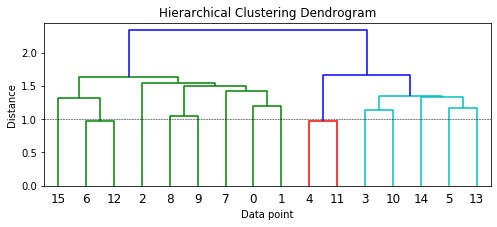

In [41]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5);

Sin embargo, al considerar una distancia máxima de 2, se definen 2 clusters.

In [42]:
from scipy.cluster.hierarchy import fcluster
max_dist = 2.0
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([noticias[['Text','Label']], cluster_labels], axis=1)

,Text,Label,ClusterLabel
0,aniversario del tiro mas famoso en la historia de las finales de la nba,Deportes,1
1,asi quiere terminar la nba: en disney florida y a finales de julio,Deportes,1
2,illa asegura en que no habia evidencia cientifica para prohibir el 8-m,Nacional,1
3,la guardia civil envia a la juez las informaciones de abc sobre irene montero y el 8-m,Nacional,2
4,la guardia civil insinua que simon oculto documentacion a la juez del 8-m,Nacional,2
5,la guardia civil zanja que sanidad era consciente del riesgo del virus desde enero,Nacional,2
6,la nba desea volver el 31 de julio,Deportes,1
7,la nba es un altavoz social y politico en estados unidos,Deportes,1
8,la nba planea retomar la temporada con 22 equipos luchando por el anillo,Deportes,1
9,la nba volvera en julio con 22 equipos concentrados en disney world,Deportes,1


## Por ultimo, a partir de la matriz TF-IDF obtenida en el paso 4, realice una clasificación utilizando el algoritmo Naive Bayesiano y obtenga la matriz de confusión correspondiente

In [43]:
#Set Random seed
np.random.seed(387)

La proporción de las categorias en los documentos es de 50%.

In [46]:
noticias['Label'].value_counts(normalize=True)

Deportes    0.5
Nacional    0.5
Name: Label, dtype: float64

Realizo una división de train y test, aunque la muestra sea pequeña, para evaluar el desempeño del clasificador y se define que se mantenga la proporción de 50% con la propiedad `stratify`.
Como la muestra tiene una proporción de 50% cada categoria, puede significar que el clasificador naive bayes funcione bien pero esto puede ser irreal dado que la muestra es pequeña, asi que si se ingresan nuevos datos su precisión podria bajar significativamente.

In [55]:
Train_x, Test_x, Train_y, Test_y = model_selection.train_test_split(noticias['Text_Final'],noticias['Label'],
                                                                    test_size=0.3, stratify=noticias['Label'])

In [56]:
Train_y.value_counts(normalize=True)

Deportes    0.545455
Nacional    0.454545
Name: Label, dtype: float64

In [57]:
Test_y.value_counts(normalize=True)

Nacional    0.6
Deportes    0.4
Name: Label, dtype: float64

A continuación, se codifica los valores de las categorias `Label`.

In [58]:
# Codificación de etiquetas (categorías)
# Las categorías tienen una etiqueta tipo string, pero los algoritmos de clasifiación necesitan un valor numérico
Encoder = LabelEncoder()
Train_y = Encoder.fit_transform(Train_y)
Test_y = Encoder.fit_transform(Test_y)

Se transforman los valores de Train_X y Test_x basandose en el ajuste de la matriz TF-IDF (del paso 4)

In [62]:
Train_X_Tf = tv.transform(Train_x)
Test_X_Tf = tv.transform(Test_x)

Como se preveia, la precisión es alta, pero se debe a que la muestra es pequeña y los datos estan categorizados en la misma proporción y son categorias muy separadas (`Nacional` y `Deportes`), por ejemplo las noticias de `Deportes` mencionan a `NBA` y evidentemente no son nacionales.

In [65]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tf,Train_y)

# Se generan las predicciones
predictions_NB = Naive.predict(Test_X_Tf)

# Y se obtiene la precisión del modelo 
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_y)*100)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(Test_y,predictions_NB))

Naive Bayes Accuracy Score ->  100.0
Naive Bayes Confusion Matrix:
[[2 0]
 [0 3]]


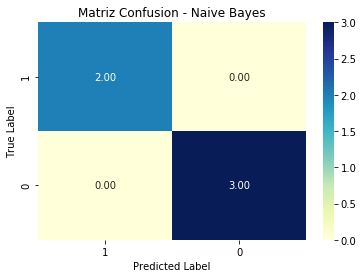

In [67]:
sns.heatmap(confusion_matrix(Test_y,predictions_NB),annot=True, fmt=".2f", cmap="YlGnBu",#cmap="coolwarm",
            xticklabels = ["1", "0"] , yticklabels = ["1", "0"])
#sns.palplot(sns.cubehelix_palette(8))
plt.title("Matriz Confusion - Naive Bayes Test")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

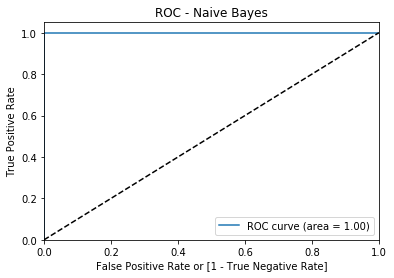

In [69]:
auc_score_nb = accuracy_score(predictions_NB, Test_y)
fpr, tpr, thresholds = metrics.roc_curve(Test_y,predictions_NB, 
                                         drop_intermediate= False)
plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()